# My First Iteration of the Benson Challenges (More to come)

### Challenge 1: Create Pandas Dataframe (as dictionay: ok'd by reshama)

In [17]:
import pandas as pd
import numpy as np

f_list=['turnstile_160618.txt',
        'turnstile_160625.txt',
        'turnstile_160702.txt'
        ]

df = pd.concat(pd.read_csv(f, sep=",") for f in f_list)
df.rename(columns=lambda x: x.strip(), inplace=True)
df = df.set_index(['C/A', 'UNIT', 'SCP', 'STATION'])



In [23]:
# import pickle  
# file_pi = open('benson_pi.obj', 'w')  
# pickle.dump(object_pi, file_pi)

### Pickle––Figure out how to use this to save time reloading projects (Not Challenge)

### Challenge 2: Convert to Timeseries

In [20]:
from dateutil import parser as dtparser
import datetime as dt

df_ts = df[['ENTRIES', 'DATE', 'TIME']]
df_ts['DATE_TIME'] = df_ts[['DATE', 'TIME']].apply(lambda x: ' '.join(x), axis=1)
df_ts['DATE_TIME'] = pd.to_datetime(df_ts['DATE_TIME'], format='%m/%d/%Y %X')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
df_ts.head()

ENTRIES           DATE-TIME
C/A  UNIT SCP      STATION                             
A002 R051 02-00-00 59 ST    5703420 2016-06-11 00:00:00
                   59 ST    5703465 2016-06-11 04:00:00
                   59 ST    5703487 2016-06-11 08:00:00
                   59 ST    5703589 2016-06-11 12:00:00
                   59 ST    5703880 2016-06-11 16:00:00

### Challenge 3:  Daily Total Entries


In [8]:
import pandas as pd
import numpy as np
df_ts = pd.read_csv('df_ts_benson.csv')
# Convert to the Date String imported from csv back into a Date String
df_ts['DATE-TIME'] = pd.to_datetime(df_ts['DATE-TIME'])

In [4]:
df_ts[0:10]

,C/A,UNIT,SCP,STATION,ENTRIES,DATE-TIME
0,A002,R051,02-00-00,59 ST,5703420,2016-06-11 00:00:00
1,A002,R051,02-00-00,59 ST,5703465,2016-06-11 04:00:00
2,A002,R051,02-00-00,59 ST,5703487,2016-06-11 08:00:00
3,A002,R051,02-00-00,59 ST,5703589,2016-06-11 12:00:00
4,A002,R051,02-00-00,59 ST,5703880,2016-06-11 16:00:00
5,A002,R051,02-00-00,59 ST,5704266,2016-06-11 20:00:00
6,A002,R051,02-00-00,59 ST,5704439,2016-06-12 00:00:00
7,A002,R051,02-00-00,59 ST,5704481,2016-06-12 04:00:00
8,A002,R051,02-00-00,59 ST,5704495,2016-06-12 08:00:00
9,A002,R051,02-00-00,59 ST,5704591,2016-06-12 12:00:00


In [9]:
# Create the Time Delta abd Entries Delta for total Daily counts
df_ts['ENTRIES-COUNT'] = df_ts['ENTRIES'].diff()

# THROW OUT ENTRIES OVER 1800 and LESS THAN 0 
# In future use: # df_ts[(df_ts['ENTRIES-COUNT'] <= 1800) | (df['ENTRIES-COUNT'] < 0 ')]
df_ts = df_ts[df_ts['ENTRIES-COUNT'] <= 1800]
df_ts = df_ts[df_ts['ENTRIES-COUNT'] > 0]


df_ts['TIME-DELTA'] = df_ts['DATE-TIME'].diff()
df_ts['DATE'] = df_ts['DATE-TIME'].dt.date
df_ts.groupby(by=['C/A','UNIT','SCP','STATION','DATE'])['ENTRIES-COUNT'].sum()

C/A    UNIT  SCP       STATION        DATE      
A002   R051  02-00-00  59 ST          2016-06-11     846
                                      2016-06-12     692
                                      2016-06-19     243
                                      2016-06-20    1414
                                      2016-06-21    1679
                                      2016-06-22    1698
                                      2016-06-23    1599
                                      2016-06-24    1439
                                      2016-06-25     707
                                      2016-06-26     630
                                      2016-06-27    1533
                                      2016-06-28    1654
                                      2016-06-29    1634
                                      2016-06-30    1742
                                      2016-07-01    1656
             02-00-01  59 ST          2016-06-11     709
                                      2

### Challenge 4:  Plot the daily time series for a turnstile.
Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

In [11]:
df_ts.head()

,C/A,UNIT,SCP,STATION,ENTRIES,DATE-TIME,ENTRIES-COUNT,TIME-DELTA,DATE
1,A002,R051,02-00-00,59 ST,5703465,2016-06-11 04:00:00,45,NaT,2016-06-11
2,A002,R051,02-00-00,59 ST,5703487,2016-06-11 08:00:00,22,04:00:00,2016-06-11
3,A002,R051,02-00-00,59 ST,5703589,2016-06-11 12:00:00,102,04:00:00,2016-06-11
4,A002,R051,02-00-00,59 ST,5703880,2016-06-11 16:00:00,291,04:00:00,2016-06-11
5,A002,R051,02-00-00,59 ST,5704266,2016-06-11 20:00:00,386,04:00:00,2016-06-11


TypeError: There is no Line2D property "xlabel"

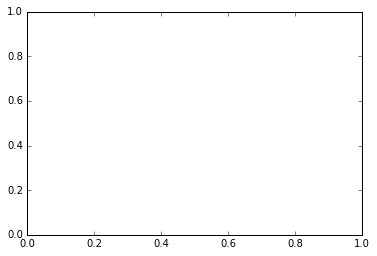

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df_ts.groupby(by=['C/A','UNIT','SCP','STATION','DATE'])['ENTRIES-COUNT'].sum()
#x.plot(kind='line')

#x
#ax = x.plot(kind='line', x='Turnstile', y='Entries-Count', color='DarkBlue', label='Group 1');
#plt.figure()
x.loc[['A002','59 ST']].plot(kind='line',label='Group 1', title = "Blah")
#plt.xlabel('Turstile')
#plt.ylabel('xlabel')
#pl
#_ =plt.ylabel('ylabel')



### Challenge 5: Counts/Day from Single Turnstile
So far we've been operating on a single turnstile level, let's
combine turnstiles in the same ControlArea/Unit/Station combo. There
are some ControlArea/Unit/Station groups that have a single
turnstile, but most have multiple turnstilea-- same value for the
C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.


In [13]:
x = df_ts.groupby(by=['C/A','UNIT','STATION','DATE'])['ENTRIES-COUNT'].sum()
x[0:10]

C/A   UNIT  STATION  DATE      
A002  R051  59 ST    2016-06-11     8287
                     2016-06-12     8973
                     2016-06-13    16726
                     2016-06-14    18357
                     2016-06-15    18444
                     2016-06-16     4086
                     2016-06-18     7936
                     2016-06-19     8253
                     2016-06-20    16381
                     2016-06-21    18349
Name: ENTRIES-COUNT, dtype: float64

### Challenge 6:  All Turnstiles for each Station
Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [14]:
x = df_ts.groupby(by=['C/A','STATION','DATE'])['ENTRIES-COUNT'].sum()
x.loc[['A002','59 ST']]

C/A   STATION  DATE      
A002  59 ST    2016-06-11     8287
               2016-06-12     8973
               2016-06-13    16726
               2016-06-14    18357
               2016-06-15    18444
               2016-06-16     4086
               2016-06-18     7936
               2016-06-19     8253
               2016-06-20    16381
               2016-06-21    18349
               2016-06-22    18662
               2016-06-23    18310
               2016-06-24    17850
               2016-06-25     8592
               2016-06-26     8827
               2016-06-27    16670
               2016-06-28    18153
               2016-06-29    18022
               2016-06-30    18088
               2016-07-01    16908
Name: ENTRIES-COUNT, dtype: float64

### Challenge 7: Plot Time Series for Each Station

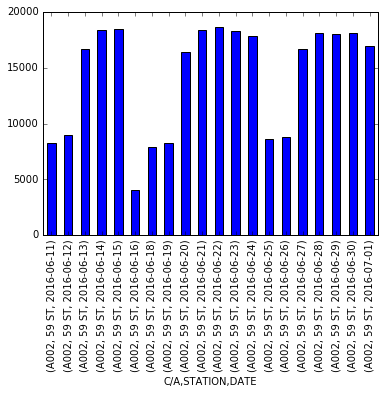

In [15]:
x.loc[['A002','59 ST']].plot(kind="bar")

### Challenge 8:  
- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.


In [16]:
df_ts.head()

,C/A,UNIT,SCP,STATION,ENTRIES,DATE-TIME,ENTRIES-COUNT,TIME-DELTA,DATE
1,A002,R051,02-00-00,59 ST,5703465,2016-06-11 04:00:00,45,NaT,2016-06-11
2,A002,R051,02-00-00,59 ST,5703487,2016-06-11 08:00:00,22,04:00:00,2016-06-11
3,A002,R051,02-00-00,59 ST,5703589,2016-06-11 12:00:00,102,04:00:00,2016-06-11
4,A002,R051,02-00-00,59 ST,5703880,2016-06-11 16:00:00,291,04:00:00,2016-06-11
5,A002,R051,02-00-00,59 ST,5704266,2016-06-11 20:00:00,386,04:00:00,2016-06-11


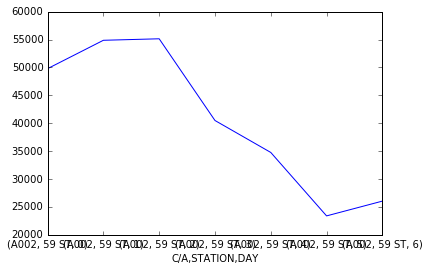

In [161]:
df_ts['DAY'] = df_ts['DATE-TIME'].dt.weekday
x = df_ts.groupby(by=['C/A','STATION','DAY'])['ENTRIES-COUNT'].sum()
x.loc[['A002','59 ST']].plot(kind='line')

### Challenge 9: Sum Total By Station
- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [17]:
x = df_ts.groupby(by=['STATION'])['ENTRIES-COUNT'].sum()
x

STATION
1 AV                431436
103 ST              607544
103 ST-CORONA       378609
104 ST               68038
110 ST              235968
111 ST              304946
116 ST              669648
116 ST-COLUMBIA     248044
121 ST               47313
125 ST             1372174
135 ST              379809
137 ST CITY COL     272892
138/GRAND CONC       63052
14 ST              1107202
14 ST-UNION SQ     1854115
145 ST              690398
149/GRAND CONC      225269
14TH STREET         176408
15 ST-PROSPECT      117019
155 ST              129987
157 ST              188358
161/YANKEE STAD     538136
163 ST-AMSTERDM      86873
167 ST              377798
168 ST              458410
169 ST              156954
170 ST              308731
174 ST              114312
174-175 STS         104028
175 ST              257308
                    ...   
SUTPHIN-ARCHER      467582
SUTTER AV            85060
SUTTER AV-RUTLD     161358
THIRTY ST           189923
THIRTY THIRD ST     429459
TIMES SQ-42 ST     1

### Challenge 10
 Make a single list of these total ridership values and plot it with
```
plt.hist(total_ridership_counts)
```
To get an idea about the distribution of total ridership among
different stations. This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

(array([ 272.,   63.,   17.,    7.,    5.,    2.,    3.,    3.,    0.,    1.]),
 array([  4.00000000e+01,   2.92156200e+05,   5.84272400e+05,
          8.76388600e+05,   1.16850480e+06,   1.46062100e+06,
          1.75273720e+06,   2.04485340e+06,   2.33696960e+06,
          2.62908580e+06,   2.92120200e+06]),
 <a list of 10 Patch objects>)

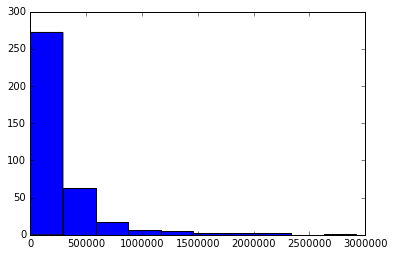

In [18]:
plt.hist(x)